# Imports and configurations

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# A good technique to try (I put this at the beginning of any 
# script using tensorflow or keras). This prevents that resource 
# exhausted error assuming you're batch size is within reason.
# Source: https://github.com/tensorflow/tensorflow/issues/9829

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# # Now when creating your session pass this config to it.
# sess = tf.Session(config=config)

# Load Data

In [3]:
# import dataset 28x28 images of handwritten digits
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check loaded images

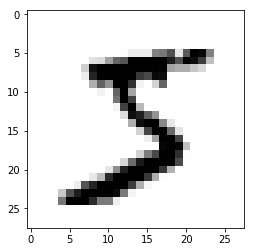

In [4]:
# Check first training image and class label
# print x_train[0].shape (28, 28)
# print x_train[0]
# print y_train[0]

# Show image in BW
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# Normalize data

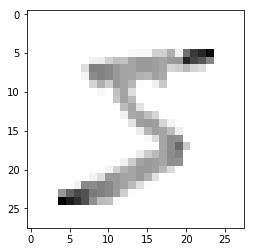

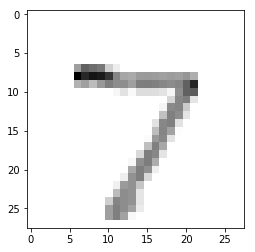

In [5]:
# Normalize training and test sets
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Check normalized images again
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

# Build model

In [6]:
# Build a sequential model: 
# 1. add Flatten, 
# 2. add 2x Dense with 128 neurons use relu for activation function
# 3. add dense output layer with 10 neurons (for 10 digits) and 
# use softmax to get the neuron with most prob distribution
# 4. Compile with Adam optimizer and  sparse categorical Xentropy 
# loss. Track accuracy each run
# 5. Fit the model with 3 epochs

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 11s 187us/step - loss: 0.2687 - acc: 0.9223
Epoch 2/3
60000/60000 [==============================] - 10s 170us/step - loss: 0.1106 - acc: 0.9653
Epoch 3/3
60000/60000 [==============================] - 10s 171us/step - loss: 0.0747 - acc: 0.9764


# Evaluate Model

In [7]:
# Evaluate model against test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print val_loss
print val_acc

10000/10000 [==============================] - 1s 52us/step
0.09506172319399193
0.9685


# Save/Load Model - if needed

In [ ]:
# If needed, use lines below to save and load models
# model.save("digit_reader.model")
# my_model = tf.keras.models.load_model("digit_reader.model")

# Predictions

Predicted digit: 6


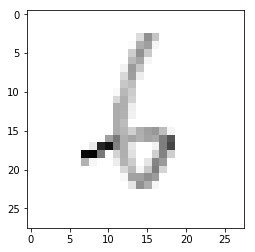

Predicted digit: 1


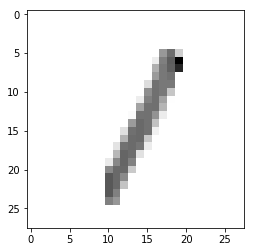

Predicted digit: 1


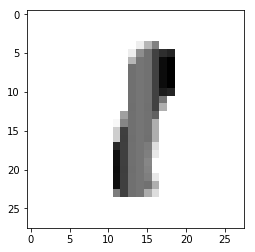

Predicted digit: 1


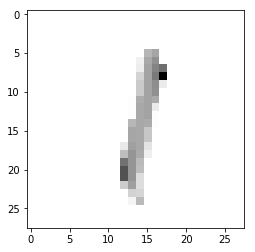

Predicted digit: 2


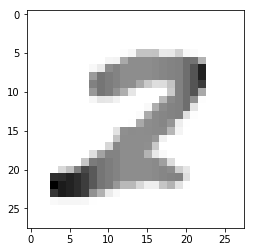

In [17]:
# Predict probabilities of X being a digit from 0 - 9
# Choose the digit (output neuron) with highest probability
prediction_scores = model.predict(x_test)
predictions = np.argmax(prediction_scores, axis=1)

# Check validity with one predicted digit vs actual image
np.random.seed(0)
for ix in np.random.randint(0, len(predictions), 5):
    print "Predicted digit: {:d}".format(predictions[ix])
    plt.imshow(x_test[ix], cmap=plt.cm.binary)
    plt.show()